## Scraping Number of Freelancer by Country

In [7]:
import requests as r
def no_of_freelancers(country):
    
    url = f"https://www.freelancer.in/ajax/directory/getFreelancer.php?countries%5B%5D={country}&limit=1"
    x = r.get(url).json()
    count = 0
    if x['status'] == 'success':
        count = x['count']
        
        
    print((country, count))
    DATA.append({'Country': country, "Total Freelancers": count})


In [46]:
url = f"https://www.freelancer.in/ajax/directory/getFreelancer.php?countries%5B%5D=India&limit=1"
x = r.get(url).json()
len(x['users'])

1

In [2]:
import pandas as pd
df = pd.read_excel('./output.xlsx')

In [6]:
countries = df.country.unique()
countries

array(['Bangladesh', 'Argentina', 'India', 'Jamaica', 'Pakistan',
       'Greece', 'Indonesia', 'Philippines', 'Sri Lanka', 'Canada',
       'Nepal', 'Ukraine', 'Croatia', 'Tunisia', 'Serbia', 'Turkey',
       'Portugal', 'Romania', 'Bosnia and Herzegovina', 'Lebanon',
       'Algeria', 'Egypt', 'United Arab Emirates', 'Colombia', 'Thailand',
       'Zambia', 'United States', 'Chile', 'Afghanistan', 'Saudi Arabia',
       'Kenya', 'Australia', 'Taiwan', 'Venezuela', 'Iraq', 'Nigeria',
       'Jordan', 'Belarus', 'Vietnam', 'Italy', 'Morocco', 'Kazakhstan',
       'Czech Republic', 'Mexico', 'Bahrain', 'Spain', 'Ethiopia',
       'Bulgaria', 'Barbados', 'Peru', 'Ecuador', 'United Kingdom',
       'Russian Federation', 'Germany', 'Brazil', 'Armenia',
       'Moldova, Republic of', 'China', 'Bolivia', 'Azerbaijan',
       'Singapore', 'France', 'Malta', 'Georgia', 'El Salvador',
       'Paraguay', 'Hong Kong', 'Poland', 'Honduras', 'Mauritius',
       'Austria', 'Sweden', 'Montenegro', 'T

In [8]:
from concurrent.futures import ThreadPoolExecutor

DATA = []
with ThreadPoolExecutor() as ex:
    ex.map(no_of_freelancers, countries)


('Jamaica', 2906)
('Greece', 6415)
('Bangladesh', 202640)('Indonesia', 141444)
('Argentina', 64187)('Pakistan', 369673)

('India', 1686167)

('Canada', 24827)
('Philippines', 123210)
('Ukraine', 16344)
('Serbia', 8243)
('Turkey', 73631)
('Nepal', 32071)
('Bosnia and Herzegovina', 3573)
('Romania', 17460)
('Lebanon', 8415)
('Portugal', 12825)
('United Arab Emirates', 19285)
('Algeria', 15474)
('Croatia', 2896)
('Tunisia', 9322)
('Sri Lanka', 44615)
('Colombia', 50417)
('Zambia', 1778)
('Kenya', 43327)
('Saudi Arabia', 16395)
('Chile', 9948)
('Afghanistan', 2512)
('United States', 117368)
('Australia', 15832)
('Taiwan', 1522)
('Iraq', 5566)
('Egypt', 125784)
('Vietnam', 40283)
('Thailand', 3609)
('Italy', 25055)
('Kazakhstan', 2497)
('Jordan', 5828)
('Nigeria', 70076)
('Czech Republic', 2260)
('Mexico', 42206)
('Bahrain', 1495)
('Morocco', 27977)
('Ethiopia', 6759)
('Venezuela', 30333)
('Belarus', 3376)
('Barbados', 153)
('Ecuador', 9958)
('Spain', 27992)
('United Kingdom', 33318)
('Bulg

In [14]:
df1 = pd.DataFrame(DATA)
df1 = df1.sort_values('Total Freelancers', ascending=False)
df1

,Country,Total Freelancers
5,India,1686167
6,Pakistan,369673
2,Bangladesh,202640
4,Indonesia,141444
32,Egypt,125784
...,...,...
122,Bhutan,357
106,Tajikistan,337
87,Luxembourg,285
123,Swaziland,190


In [16]:
df1.to_csv('freelancer_count_by_country.csv', index=False)

## Plot Pie chart of this data

In [26]:
df1['Total Freelancers'].sum()
total_freelancers_worldwide = 4073892
# 4051240

In [94]:
df1['percent'] = (df1['Total Freelancers']/total_freelancers_worldwide)*100
df1[:10]

,Country,Total Freelancers,percent
5,India,1686167,41.389585
6,Pakistan,369673,9.074197
2,Bangladesh,202640,4.974113
4,Indonesia,141444,3.471962
32,Egypt,125784,3.087563
61,Brazil,123830,3.039599
8,Philippines,123210,3.024381
28,United States,117368,2.880980
11,Turkey,73631,1.807387
38,Nigeria,70076,1.720124


In [147]:
df2 = df1[:20]#df1[df1.percent>=0.5]

remain_percent = 100 - df2.percent.sum()
remain_freel = total_freelancers_worldwide - df2['Total Freelancers'].sum()

df3 = df2.append({'Country': 'Other (>100 Countries)', 'Total Freelancers': remain_freel, "percent":remain_percent}, ignore_index=True)
df3

In [192]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

Text(0.5, 1.0, 'Freelancer Population by Country')

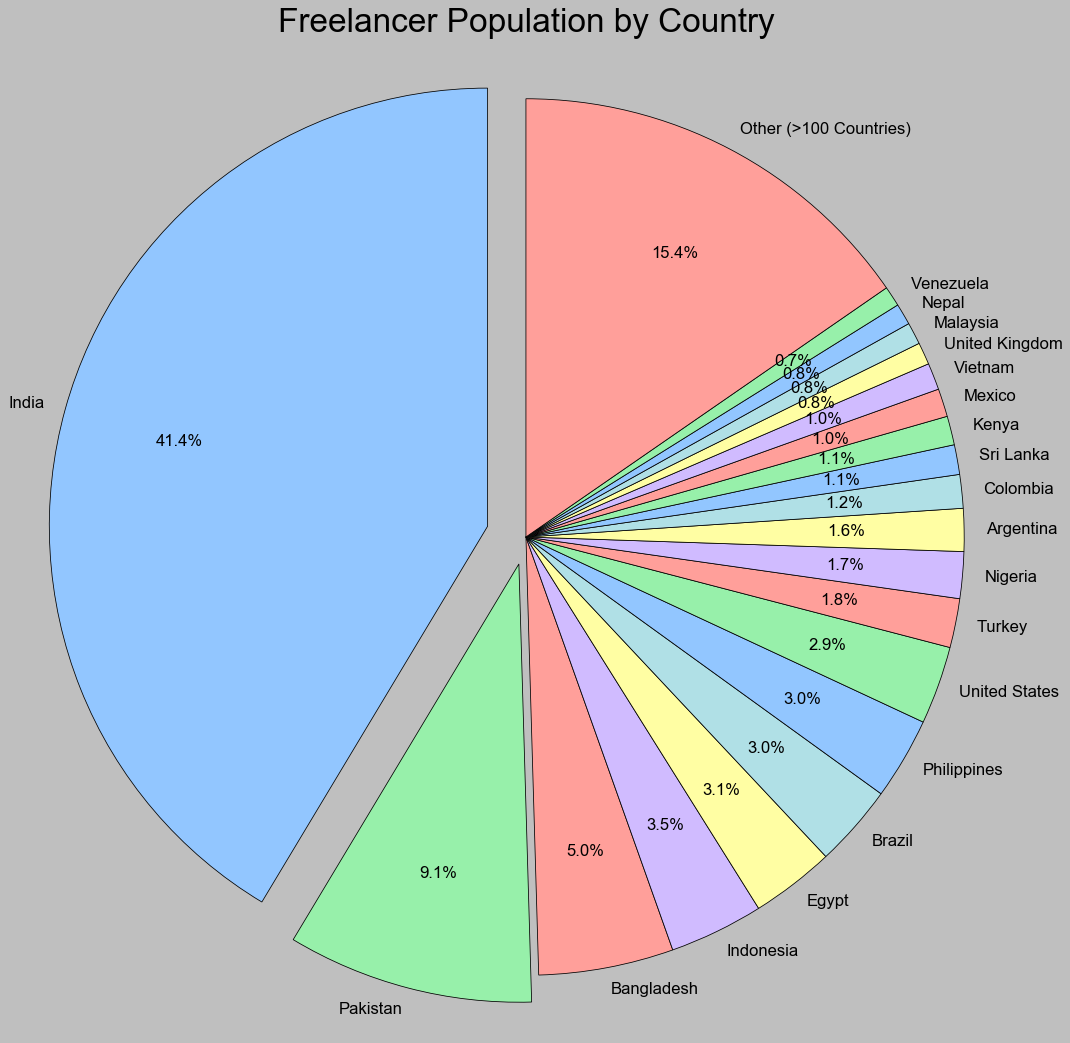

In [279]:
plt.style.use('seaborn-pastel')
fig = plt.figure(figsize=(15, 15))

plt.pie(x=df3.percent, labels=df3.Country, explode=[0.1,0.07]+[0]*19, autopct='%1.1f%%',startangle=90,pctdistance=0.73,
       textprops={'fontsize': 15},labeldistance=1.05, radius=1.1, wedgeprops = {'linewidth': 0.7})
# plt.legend(fontsize=12)
plt.title("Freelancer Population by Country", fontsize=30)

# plt.show()

In [282]:
fig.savefig('pie chart.jpg', dpi=150)

## Scrape Number of Freelancer by Country and Rating
### (Only Top 10 Countries)

In [162]:
import requests
url = "https://www.freelancer.com/api/users/0.1/users/directory/?limit=1&countries[]=%s&rating=%s"
freelancer_count = lambda country, rating: requests.get(url%(country, rating)).json()['result']['total_count']

In [ ]:
import pandas as pd
# Top 10 countries with highest no of freelancer
df = pd.read_csv('freelancer_count_by_country.csv')

In [33]:
df1 = pd.DataFrame(DATA)

In [68]:
DATA = []
for c in countries:
    for r in range(0,5+1):
        print(c,r)
        # please note that here the rating, r, say 2, means no of freelancers with rating 2 and up.
        DATA.append( [c, r, freelancer_count(c, r)] )

India 0
India 1
India 2
India 3


KeyboardInterrupt: 

In [56]:
df1 = pd.DataFrame(DATA, columns=['Country','Rating', 'Freelancer Count'])
df1.to_csv('top10_countries_freelancer_by_rank.csv',index=False)

In [ ]:
# Order it in correct way
df2 = df1.pivot_table(index='Country', columns='Rating', values='Freelancer Count')

In [ ]:
df2.rename(columns={0:'Total Freelancers'})

Rating,Total Freelancers,1,2,3,4,5
Country,,,,,,
Bangladesh,202878,15286,15231,15172,14905,8338
Brazil,124076,1761,1756,1748,1728,1244
Egypt,126025,4666,4639,4620,4549,2927
India,1688171,28469,28268,28110,27602,15153
Indonesia,141855,2714,2706,2698,2651,1623
Nigeria,70184,1331,1319,1310,1283,818
Pakistan,370228,11899,11822,11763,11552,6211
Philippines,123445,2972,2949,2937,2900,1963
Turkey,73802,1822,1815,1810,1787,1256


In [97]:
df3 = df2.copy()

df3[4] = df2[4] - df2[5]
df3[3] = df2[3] - df2[4]
df3[2] = df2[2] - df2[3]
df3[1] = df2[1] - df2[2]
df3['<1'] = df2[0] - df2[1]
df3

Rating,0,1,2,3,4,5,<1
Country,,,,,,,
Bangladesh,202878,55,59,267,6567,8338,187592
Brazil,124076,5,8,20,484,1244,122315
Egypt,126025,27,19,71,1622,2927,121359
India,1688171,201,158,508,12449,15153,1659702
Indonesia,141855,8,8,47,1028,1623,139141
Nigeria,70184,12,9,27,465,818,68853
Pakistan,370228,77,59,211,5341,6211,358329
Philippines,123445,23,12,37,937,1963,120473
Turkey,73802,7,5,23,531,1256,71980


In [105]:
df3 = df3.sort_values(by=0, ascending=False)
df3 = df3.rename(columns={0:'Total Freelancers'})

Rating,Total Freelancers,1,2,3,4,5,<1
Country,,,,,,,
India,1688171,201,158,508,12449,15153,1659702
Pakistan,370228,77,59,211,5341,6211,358329
Bangladesh,202878,55,59,267,6567,8338,187592
Indonesia,141855,8,8,47,1028,1623,139141
Egypt,126025,27,19,71,1622,2927,121359
Brazil,124076,5,8,20,484,1244,122315
Philippines,123445,23,12,37,937,1963,120473
United States,117615,19,14,54,1434,3489,112605
Turkey,73802,7,5,23,531,1256,71980


In [2]:
import pandas as pd
df3 = pd.read_csv('freelancer_by_rank.csv', index_col='Country')
# rating that is 1 or up 
df3['≥1'] = df3.iloc[:, 2:].sum(axis=1)
df3

,Total Freelancers,<1,1,2,3,4,5,≥1
Country,,,,,,,,
India,1688171,1659702,201,158,508,12449,15153,28469
Pakistan,370228,358329,77,59,211,5341,6211,11899
Bangladesh,202878,187592,55,59,267,6567,8338,15286
Indonesia,141855,139141,8,8,47,1028,1623,2714
Egypt,126025,121359,27,19,71,1622,2927,4666
Brazil,124076,122315,5,8,20,484,1244,1761
Philippines,123445,120473,23,12,37,937,1963,2972
United States,117615,112605,19,14,54,1434,3489,5010
Turkey,73802,71980,7,5,23,531,1256,1822


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

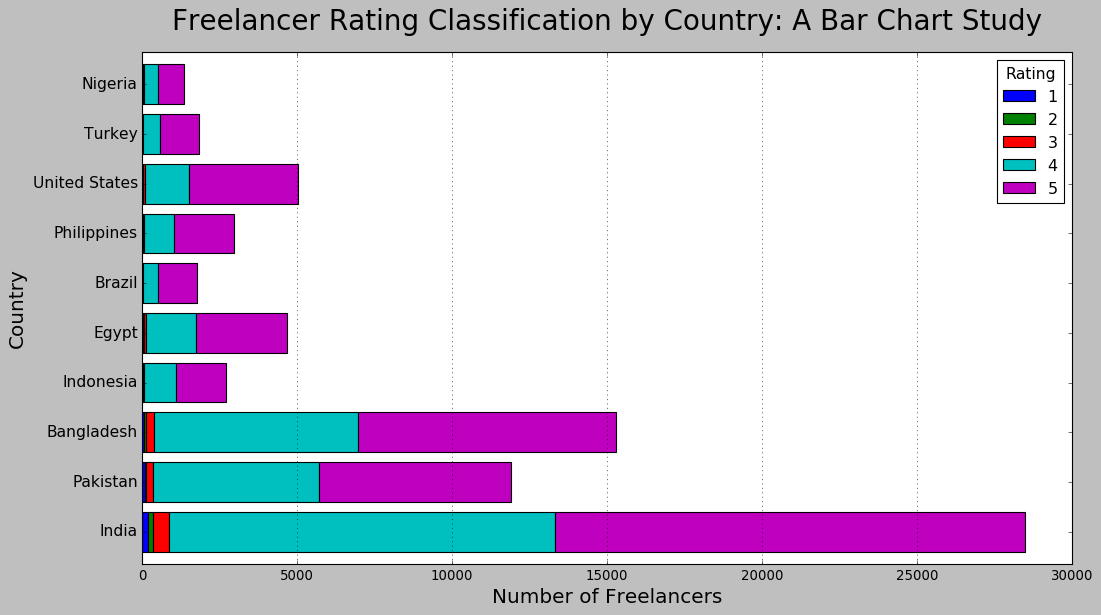

In [159]:
# plt.style.use('classic')
from matplotlib.ticker import FuncFormatter
IPython_default = plt.rcParams.copy()

ax = df3[df3.columns.difference(['Total Freelancers','<1','≥1'])].plot.barh(stacked=True,figsize=(15,8),width=0.8)
                                                                            
    

ax.yaxis.label.set_size(18)
plt.xlabel("Number of Freelancers", fontsize=18)


# Alternative Title by ChatGPT
#"Country-wise Freelancer Rating Distribution"
# 'Freelancer by Rating'
# "Freelancer Rating Classification by Country: A Bar Chart Study"
tt ="Freelancer Rating Classification by Country: A Bar Chart Study"
plt.title(tt,fontsize=25,pad=20.0)



plt.grid(True, axis='x')
plt.legend(title="Rating")

plt.rc('ytick', labelsize=14)
plt.rc('legend', title_fontsize= 14)

# convert xticks units to million
# millions = lambda x, pos: '%1.1fM'%(x/(10**6))
# ax.xaxis.set_major_formatter(FuncFormatter(millions))


ax.figure.savefig("Top Freelancer Distribution by Country 1",dpi=200)


c:\users\pratham\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
c:\users\pratham\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


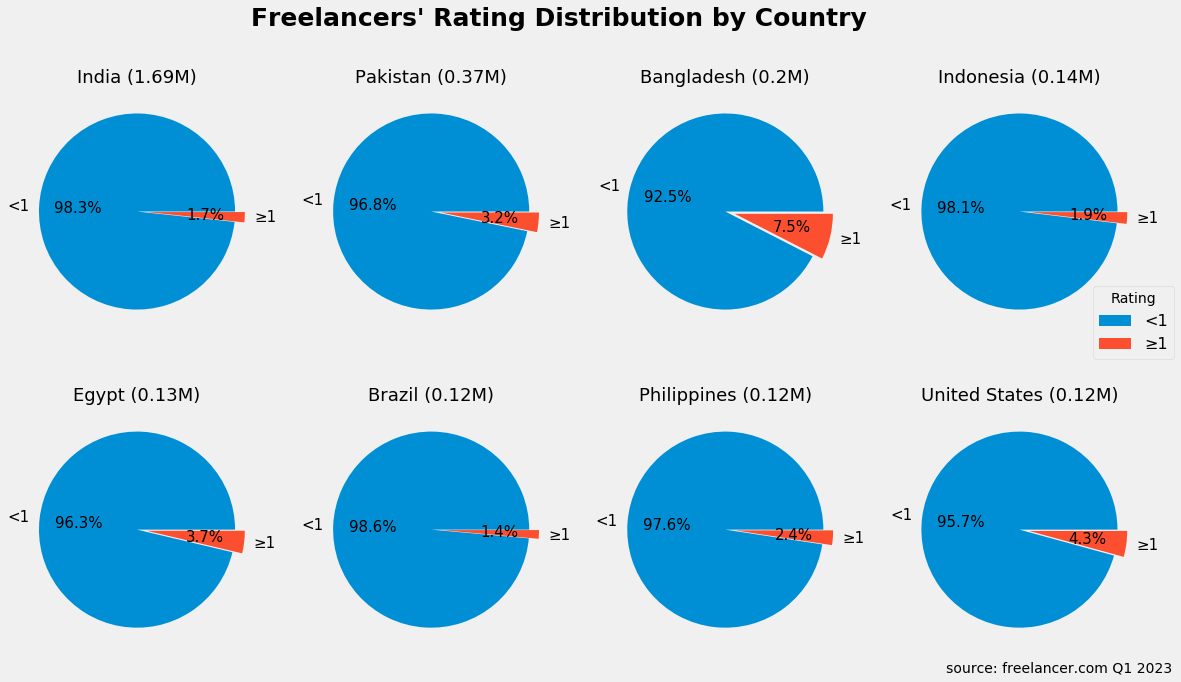

In [48]:

data= df3[['<1', '≥1']].reset_index().to_numpy()
# print(data)
plt.style.use('fivethirtyeight')
fg = plt.figure(figsize=(18,10))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.pie(data[i][1:], explode=[0,0.1], labels=['<1', '≥1'], autopct='%1.1f%%', pctdistance=0.6,
       textprops={'fontsize': 15}, shadow=False)
    plt.title("%s (%sM)"%(data[i][0], round(df3.loc[data[i][0]][0]/(10**6),2)) , fontsize=18)

plt.subplot(2,4,4)
plt.legend(title='Rating',fontsize=16, loc=(.8,-.1))
# 'Freelancers by their Rating of <1 and ≥ 1'
# "Distribution of Freelancers by Country and Rating"
main_title = "Freelancers' Rating Distribution by Country"
plt.suptitle(main_title, fontsize=25, fontweight='bold')

plt.subplot(2,4,8)
plt.text(-.75,-1.45, 'source: freelancer.com Q1 2023')
# plt.show()

fg.savefig("Freelancer by Rating", dpi=200)